# CNN for Particle Classification

In this notebook, we train 10 layers deep CNN for particle type classification ($e^-$, $\mu^-$, and $\gamma$) using the workshop dataset.

In [ ]:
from __future__ import print_function
from IPython.display import display
import torch, time
import numpy as np

We define 2 functions to be called in the training loop: forward and backward. These functions implement the evaluation of the results, error (loss) definition, and propagation of errors (gradients) back to update the network parameters.

Also import `CSVData` from our utility module, which lets us write train log (accuracy, loss, etc.) in a csv file.

Finally, we're ready to run the training! Let's create a dataloader, write a loop to  call forward and backward.

<class 'h5py._hl.files.File'>
[u'directions', u'energies', u'event_data', u'labels', u'pids', u'positions']
(99999, 88, 168, 2)
(99999, 1, 3)
(99999, 1)


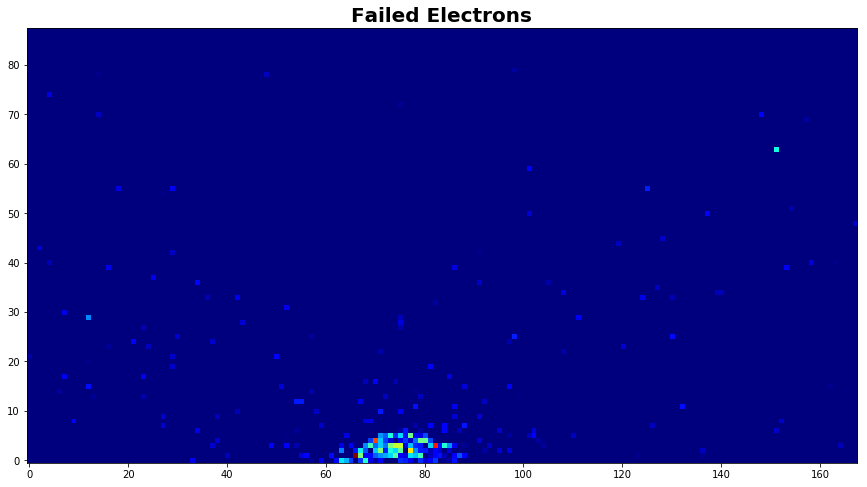

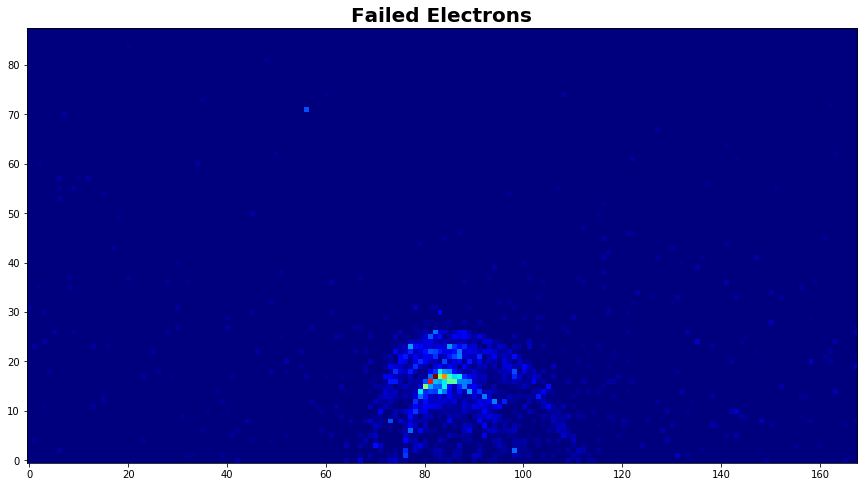

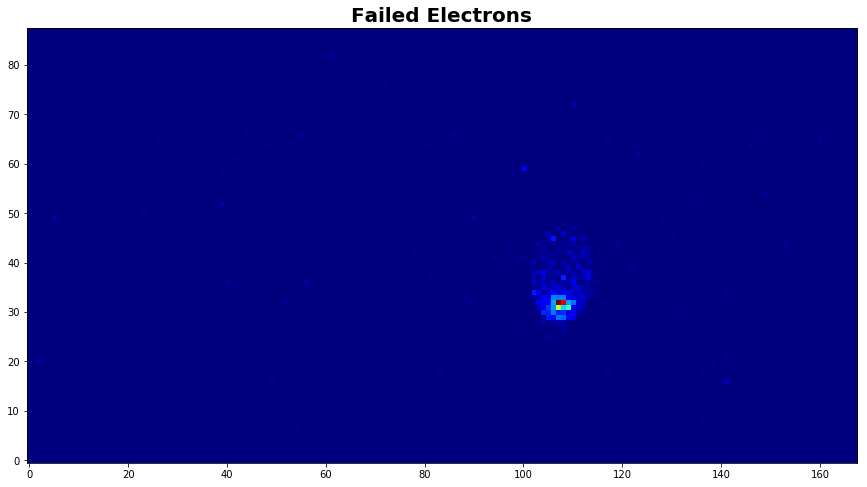

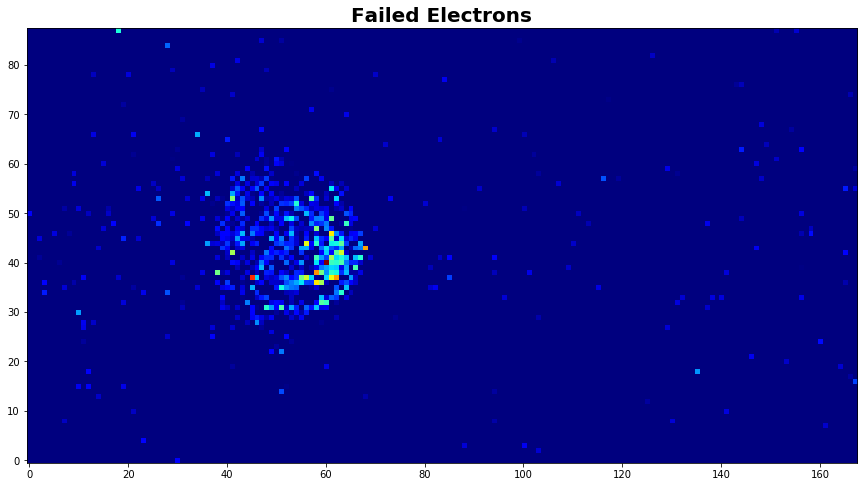

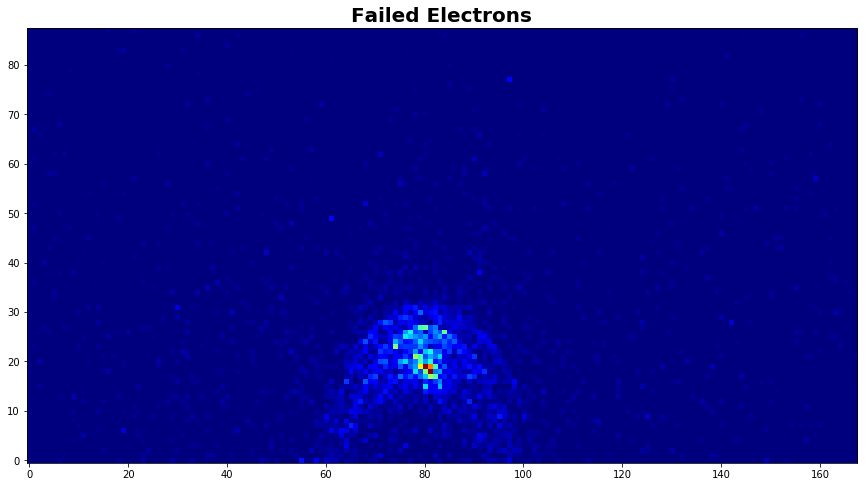

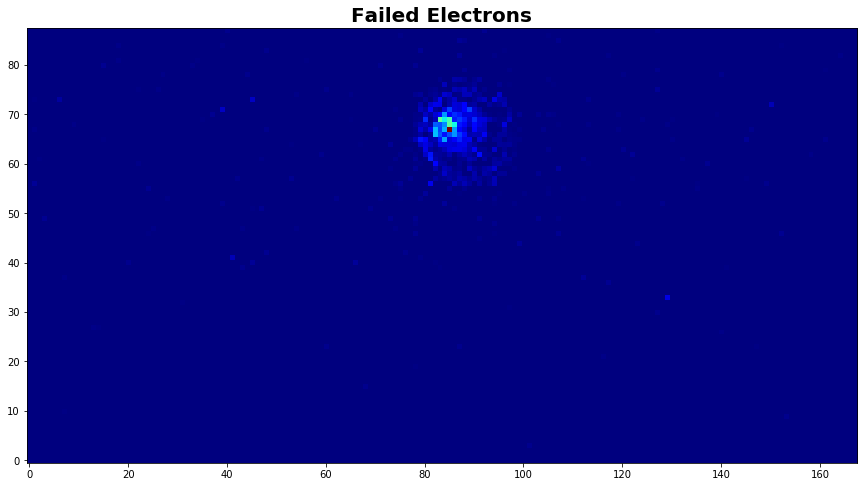

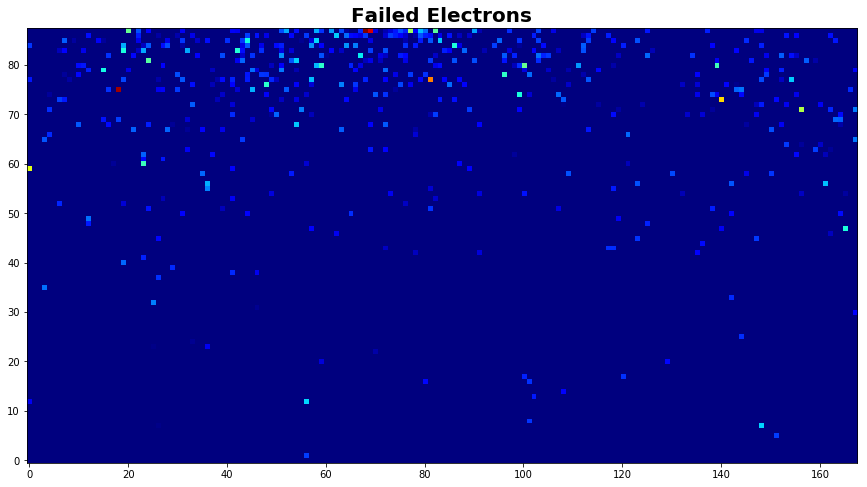

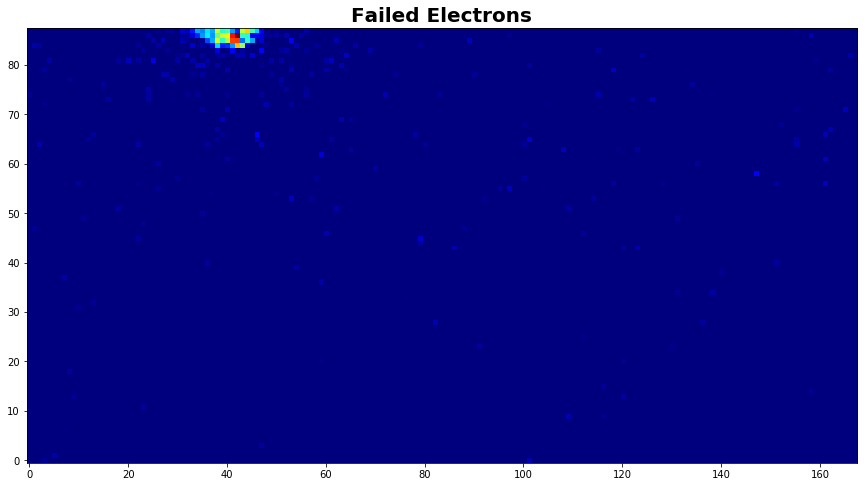

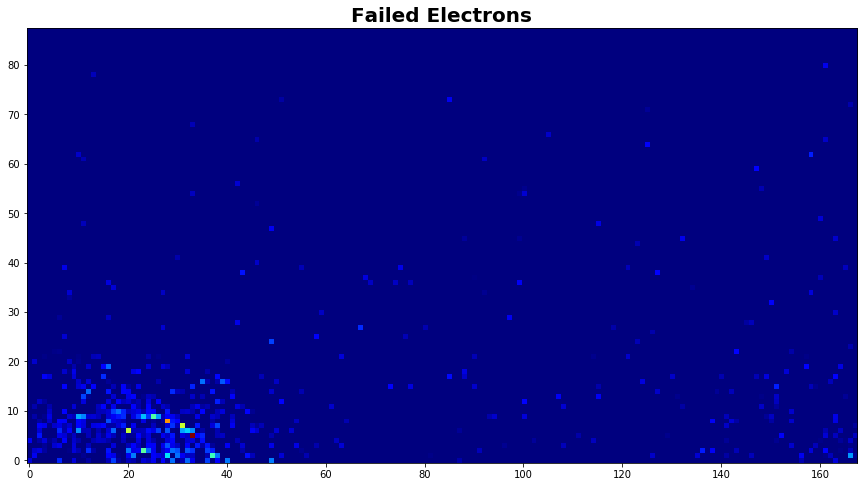

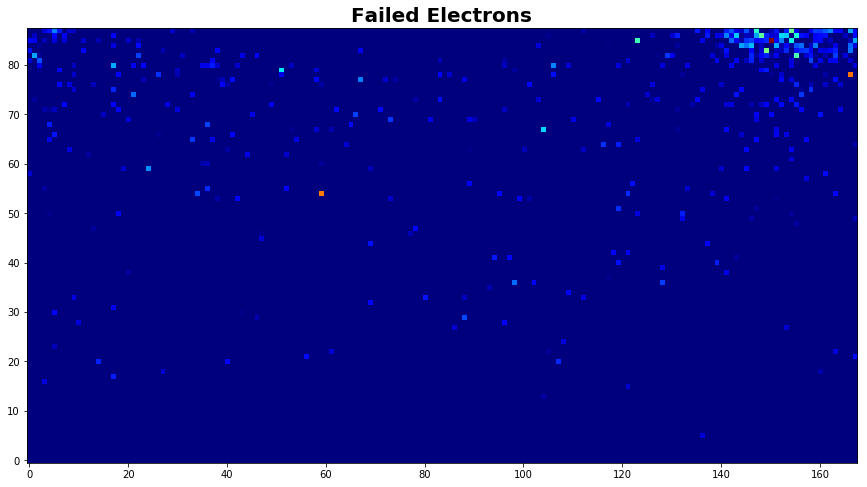

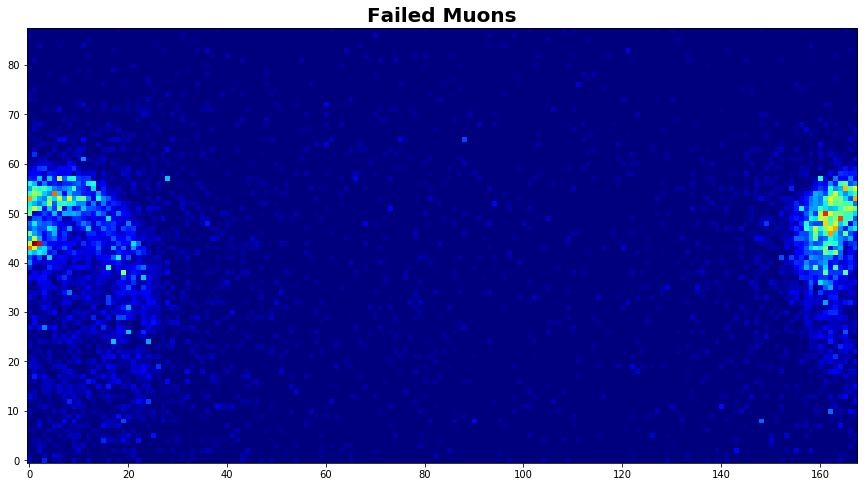

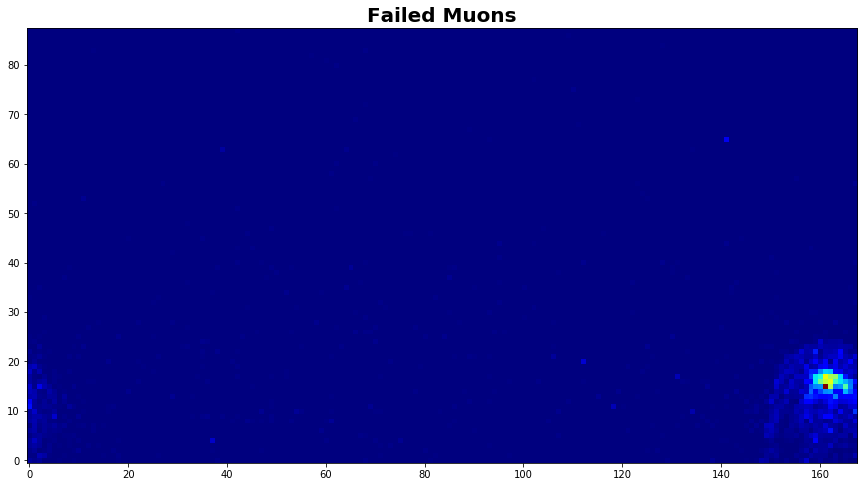

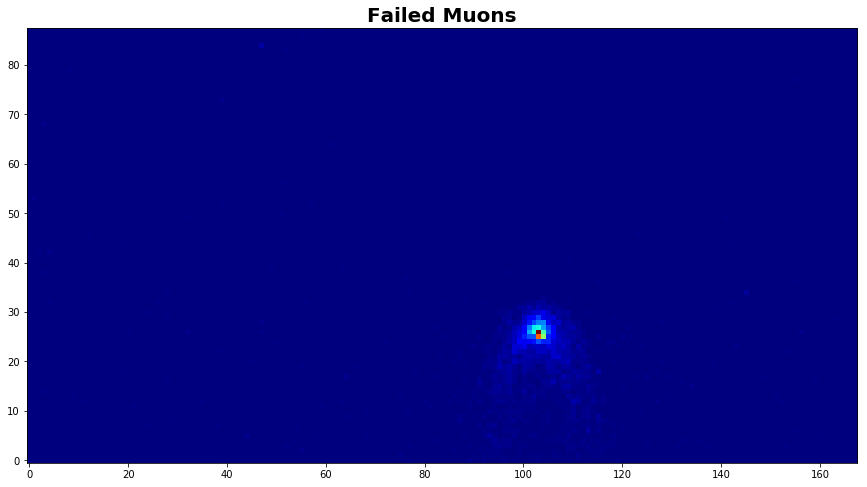

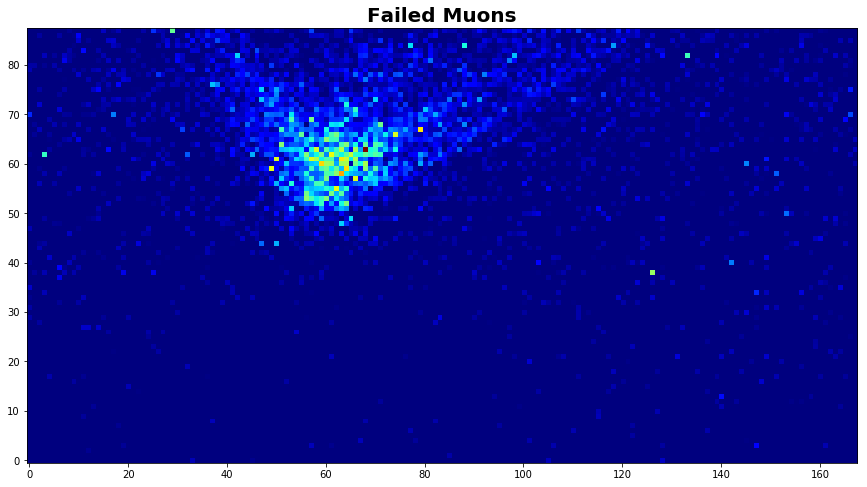

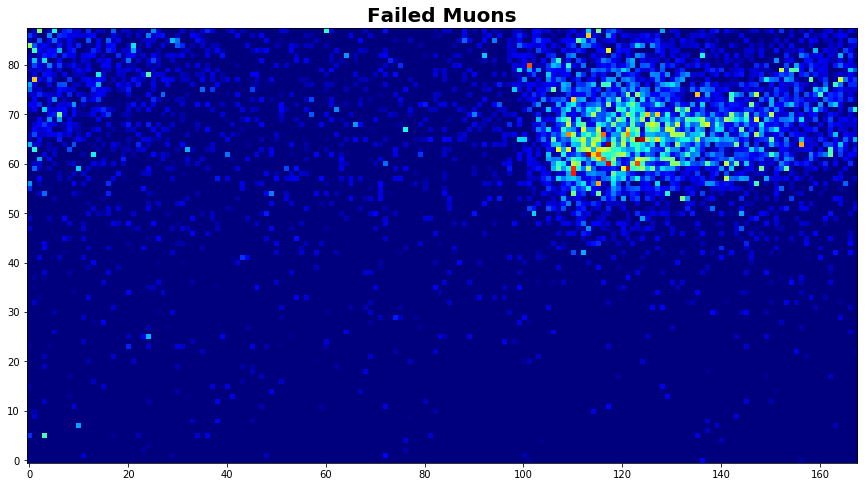

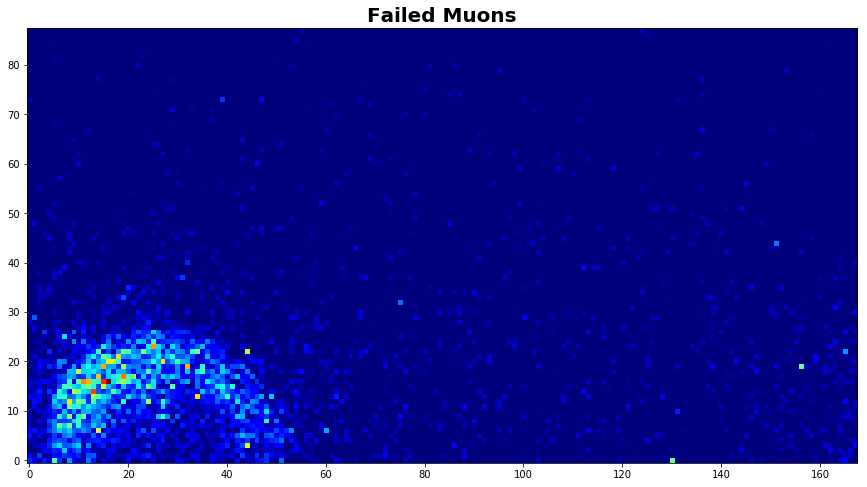

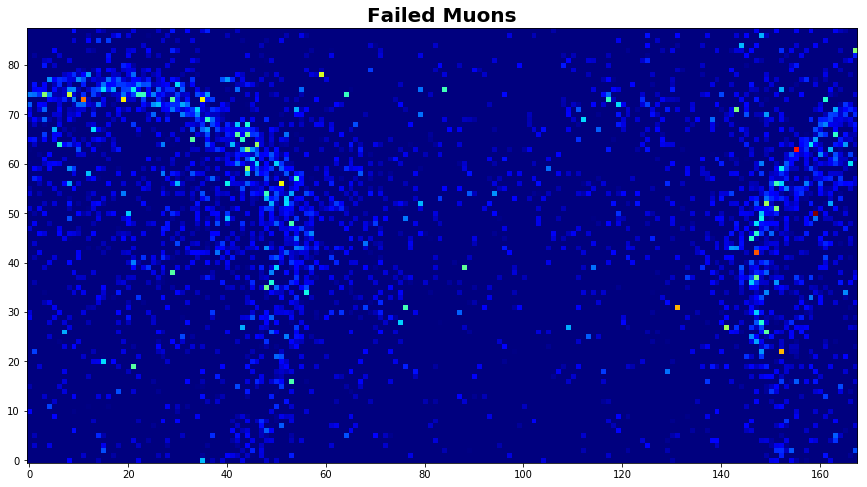

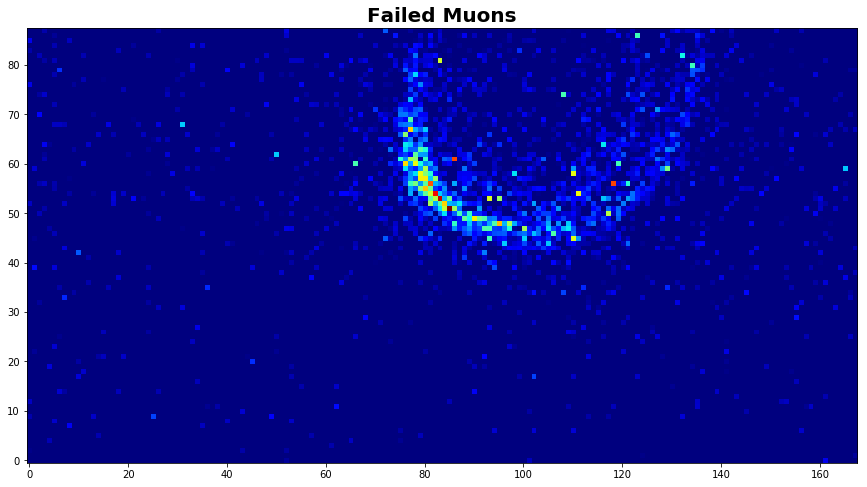

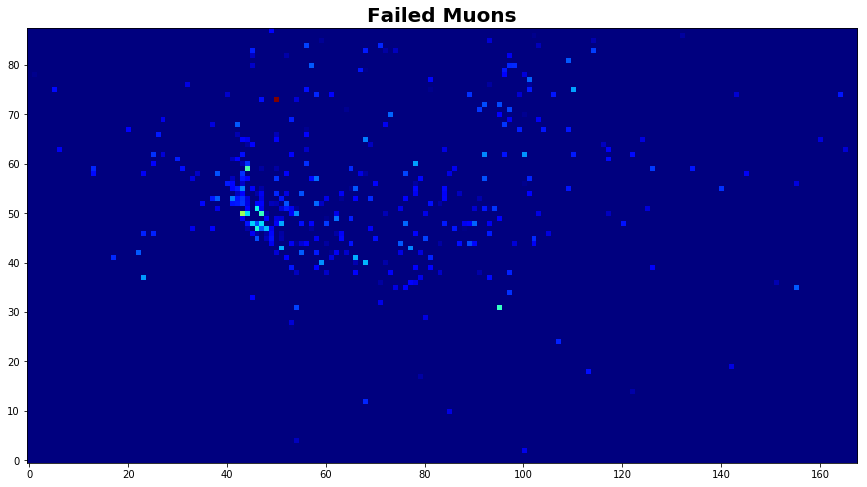

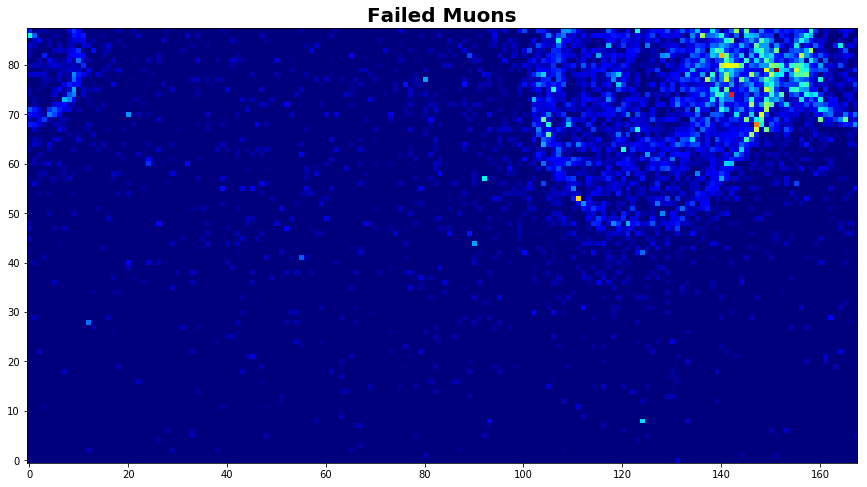

In [17]:
import numpy as np
from __future__ import print_function

# Change if you want to open a different file
#DATA_FILE_PATH='/data/hkml_data/IWCDgrid/varyE/e-/IWCDgrid_varyE_e-_R0cm_20-2000MeV_100evts_1.npz'
DATA_FILE_PATH='/data/hkml_data/IWCDgrid/varyAll/e-/IWCDgrid_varyAll_e-_20-2000MeV_100k_v2.h5'
#DATA_DIRS=['/data/hkml_data/IWCDgrid/varyAll/e-','/data/hkml_data/IWCDgrid/varyAll/mu-']

# Open file
#f = np.load(DATA_FILE_PATH)
import h5py
f = h5py.File(DATA_FILE_PATH,mode='r')
    
# Print the object type
print (type(f))

print (f.keys())

print (f['event_data'].shape)
print (f['positions'].shape)
print (f['energies'].shape)

import matplotlib.pyplot as plt
%matplotlib inline


failed_events = [36922, 32378, 35083, 33046, 35425, 31315, 31519, 36243, 33061, 38696, 38592, 34185, 39391, 34586, 31157, 37893, 35018, 34363, 38358, 33012, 30472, 30619, 30123, 36060, 34873, 38830, 32264, 39972, 34164, 32167, 33972, 39844, 33065, 39485, 30382, 30072, 33069, 36892, 37082, 35147, 35449, 35881, 31706, 35302, 31598, 32756, 39435, 31144, 39912, 34508, 36401, 31560, 37198, 35981, 35874, 30974, 37776, 35176, 37459, 31416, 34999]
failed_events2 = [36876, 39799, 32521, 31268, 30019, 33943, 36679, 38508, 35996, 30631, 38216, 34214, 39136, 30378, 32060, 33111, 39139, 36773, 33592, 33108, 35515, 39424, 31303, 38652, 36047, 38175, 39296, 37459, 33892, 32877, 38481, 39200, 39245, 33016, 37316, 33548, 37824, 38710, 34138]

#Failed *** 12956 32957 1
#Failed *** 5962 35961 0
#Failed *** 1808 31807 0
#Failed *** 2459 32458 0
#Failed *** 16370 36371 1
#Failed *** 134 30133 0
#Failed *** 16069 36070 1
#Failed *** 8645 38644 0


#Failed *** 7819 27818
#Failed *** 17935 27936
#Failed *** 8741 28740
#Failed *** 10662 20663
#Failed *** 17073 27074
#Failed *** 9810 29809
#Failed *** 13586 23587
#Failed *** 3967 23966
#Failed *** 11576 21577
#Failed *** 14522 24523
#Failed *** 736 20735
#Failed *** 267 20266

for idx in xrange(10):
    
    fig, ax = plt.subplots(figsize=(16,8),facecolor='w')
    plt.imshow(f['event_data'][failed_events[idx],:,:,0],cmap='jet',origin='lower')
    ax.set_title('Failed Electrons',fontsize=20,fontweight='bold')
    plt.show()

for idx in xrange(10):
    
    fig, ax = plt.subplots(figsize=(16,8),facecolor='w')
    plt.imshow(f['event_data'][failed_events2[idx],:,:,0],cmap='jet',origin='lower')
    ax.set_title('Failed Muons',fontsize=20,fontweight='bold')
    plt.show()


f.close()

kljkl